## Imports

In [1]:
# External libraries
import numpy as np
import uproot
import awkward as ak

In [2]:
# pyutils
sys.path.append('../EventNtuple/utils/pyutils')

import pyimport as pyim
import pyprint as prnt
import pyplot as plot

pr = prnt.Print()
pl = plot.Plot()

In [3]:
# anapytools
from anapytools.read_data import DataReader
rd = DataReader()

## Read data

In [4]:
class ReadRec:
    
    def __init__(self):
        """  Placeholder init """
        pass  
    
    # Class variable
    # treenames_ = ['runSummary', 'run', 'spills'] 
    treenames_ = ['run'] 
    
    def read(self, filename): 
    # def read(self, file): 
        # Open the file
        file = uproot.open(filename)
        # Get trees
        trees_ = {treename: file[treename] for treename in self.treenames_ if treename in file}
        # Load into array
        arrays_ = {} 
        for treename, tree in trees_.items():
            # arrays_[treename] = tree.arrays() # entire tree is far too large 
            arrays_[treename] = tree.arrays(filter_name=["eventNumber", "PEsTemperatureCorrected"], library="ak")
        # Close file
        file.close()
        # Return
        return arrays_

In [5]:
# filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.crvaging-019.002100_000.root'
# Grab file from /pnfs
# filename='rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002101_000.root'
# file = rd.read_file(filename)

In [6]:
# filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.crvaging-019.002100_000.root' # 1 hour 
filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.CRVWB-000-010-000.002101_000.root' # 24 hour / 5 = ~5 hours
reader = ReadRec()
arrays_ = reader.read(filename)

In [7]:
# Rename PE
# arrays_["PEs"] = arrays_["PEsTemperatureCorrected"]

In [8]:
for treename in reader.treenames_:
    pr.PrintNEvents(arrays_[treename])


---> Printing 1 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 1
PEsTemperatureCorrected: [[0.916, 0, 0, 0, 0, 0, 1.12, 0, ..., 0, 1.13, 48.2, 64.3, 0, 0, 0, 0], ...]
-------------------------------------------------------------------------------------



## Stats

In [9]:
print("# Events:", len(arrays_['run']['PEsTemperatureCorrected'][:,0,0]))
print("# FEBs:", len(arrays_['run']['PEsTemperatureCorrected'][0,:,0]))
print("# channels:", len(arrays_['run']['PEsTemperatureCorrected'][0,0,:]))

# Events: 157287
# FEBs: 8
# channels: 64


## Get PEs per layer per channel

In [10]:
# PEs per channel

# Slicing goes events:FEBs:channels

# CRV-L-end (single ended)
arrays_['run']['PEs_L_end_0'] = arrays_['run']['PEsTemperatureCorrected'][:,6,0:32] 
arrays_['run']['PEs_L_end_1'] = arrays_['run']['PEsTemperatureCorrected'][:,6,32:64]
arrays_['run']['PEs_L_end_2'] = arrays_['run']['PEsTemperatureCorrected'][:,7,0:32] 
arrays_['run']['PEs_L_end_3'] = arrays_['run']['PEsTemperatureCorrected'][:,7,32:64]

# CRV-DS (weird channel map, see https://docs.google.com/spreadsheets/d/1zcnOPcVqcXICQRvkaezWU5e04COF0k9hdntDU8LjwRI/edit?usp=sharing)
arrays_['run']['PEs_DS_0'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,0,0:16], arrays_['run']['PEsTemperatureCorrected'][:,1,15::-1]], axis=-1) 
arrays_['run']['PEs_DS_1'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,0,16:32], arrays_['run']['PEsTemperatureCorrected'][:,1,31:15:-1]], axis=-1) 
arrays_['run']['PEs_DS_2'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,0,32:48], arrays_['run']['PEsTemperatureCorrected'][:,1,47:31:-1]], axis=-1)
arrays_['run']['PEs_DS_3'] = ak.concatenate([arrays_['run']['PEsTemperatureCorrected'][:,0,48:64], arrays_['run']['PEsTemperatureCorrected'][:,1,63:47:-1]], axis=-1)

# CRV-T (double ended connection
arrays_['run']['PEs_T_0'] = (arrays_['run']['PEsTemperatureCorrected'][:,2,0:32] + arrays_['run']['PEsTemperatureCorrected'][:,4,0:32]) 
arrays_['run']['PEs_T_1'] = (arrays_['run']['PEsTemperatureCorrected'][:,2,32:64] + arrays_['run']['PEsTemperatureCorrected'][:,4,32:64])
arrays_['run']['PEs_T_2'] = (arrays_['run']['PEsTemperatureCorrected'][:,3,0:32] + arrays_['run']['PEsTemperatureCorrected'][:,5,0:32])
arrays_['run']['PEs_T_3'] = (arrays_['run']['PEsTemperatureCorrected'][:,3,32:64] + arrays_['run']['PEsTemperatureCorrected'][:,5,32:64])

In [11]:
pr.PrintNEvents(arrays_['run'], 1)


---> Printing 1 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 1
PEsTemperatureCorrected: [[0.916, 0, 0, 0, 0, 0, 1.12, 0, ..., 0, 1.13, 48.2, 64.3, 0, 0, 0, 0], ...]
PEs_L_end_0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1.07, 0, ..., 0, 0, 0.886, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 46.8, 45.1, 0, 0, 0, 0, 0, 1.19, 1.16, 0]
PEs_L_end_2: [0, 0, 0, 0.702, 0, 0, 0.868, 1.01, 0, ..., 1.51, 62.1, 56.4, 0, 1, 0, 0, 0, 0]
PEs_L_end_3: [0, 0, 0, 0, 0, 0, 0, 1.15, 0, 0, ..., 0, 0, 0, 0, 67.3, 55.9, 0, 0.903, 0, 0]
PEs_DS_0: [0.916, 0, 0, 0, 0, 0, 1.12, 0, 162, 178, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_DS_1: [0, 0, 0, 0, 0, 1.12, 0, 0, 84.3, 95.3, ..., 0, 0, 0, 1.08, 0, 0, 0, 0, 0, 0]
PEs_DS_2: [0, 0, 0, 0, 0, 0, 0.921, 0, 1.11, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0.897, 0]
PEs_DS_3: [0, 0, 0.962, 0, 0, 0, 0, 0, 0, 1.13, ..., 0, 0, 1.05, 0, 0, 0, 0, 0, 0, 1.19]
PEs_T_0: [0, 0, 0, 1.08, 0, 0, 0.921, 1.17, 0, 0

## Sanity plot 


---> Wrote:
	 ../Images/h1o_CRV_DS_PEsPerLayer.png


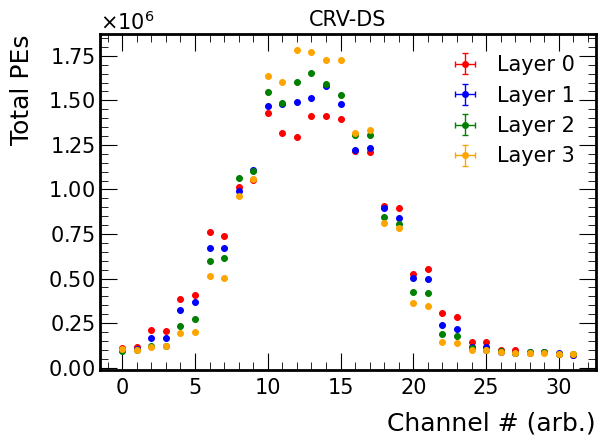


---> Wrote:
	 ../Images/h1o_CRV_T_PEsPerLayer.png


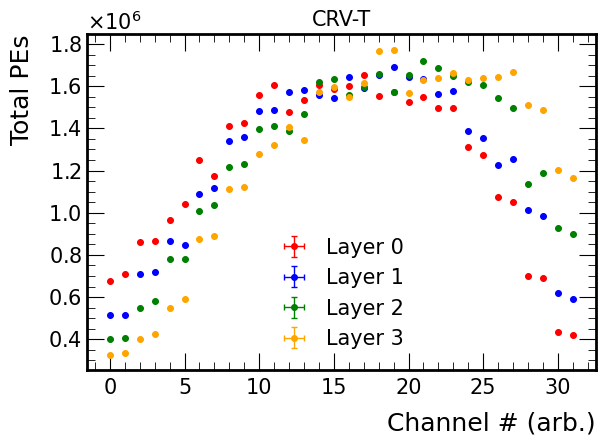


---> Wrote:
	 ../Images/h1o_CRV_L_end_PEsPerLayer.png


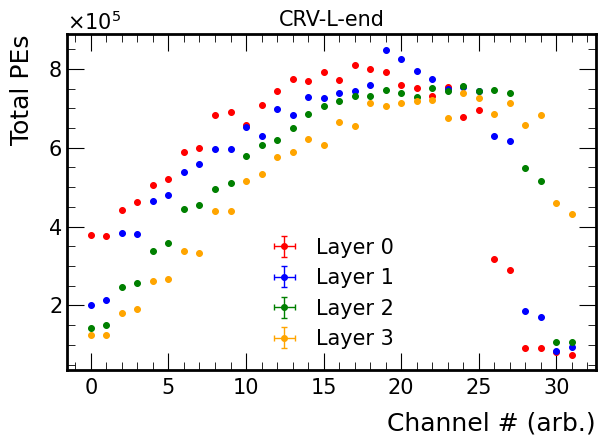

In [38]:
# print(ak.sum(arrays_['run']['PEs_DS_0'], axis=0))
# DS_0_channels_ = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]
channels_ = np.linspace(0, 31, 32)
# pl.PlotGraph(x=DS_0_channels_, y=ak.sum(arrays_['run']['PEs_DS_0'], axis=0),
#              xlabel='Channel # (arb.)', ylabel='Total PEs', title='CRV-DS, layer 0', 
#              save=False)
pl.PlotGraphOverlay( 
    {
        'Layer 0' : [channels_, ak.sum(arrays_['run']['PEs_DS_0'], axis=0), None, None], 
        'Layer 1' : [channels_, ak.sum(arrays_['run']['PEs_DS_1'], axis=0), None, None], 
        'Layer 2' : [channels_, ak.sum(arrays_['run']['PEs_DS_2'], axis=0), None, None], 
        'Layer 3' : [channels_, ak.sum(arrays_['run']['PEs_DS_3'], axis=0), None, None]
    },
    xlabel='Channel # (arb.)', ylabel='Total PEs', title='CRV-DS', 
    save=True, fout='../Images/h1o_CRV_DS_PEsPerLayer.png')

pl.PlotGraphOverlay( 
    {
        'Layer 0' : [channels_, ak.sum(arrays_['run']['PEs_T_0'], axis=0), None, None], 
        'Layer 1' : [channels_, ak.sum(arrays_['run']['PEs_T_1'], axis=0), None, None], 
        'Layer 2' : [channels_, ak.sum(arrays_['run']['PEs_T_2'], axis=0), None, None], 
        'Layer 3' : [channels_, ak.sum(arrays_['run']['PEs_T_3'], axis=0), None, None]
    },
    xlabel='Channel # (arb.)', ylabel='Total PEs', title='CRV-T', 
    save=True, fout='../Images/h1o_CRV_T_PEsPerLayer.png')

pl.PlotGraphOverlay( 
    {
        'Layer 0' : [channels_, ak.sum(arrays_['run']['PEs_L_end_0'], axis=0), None, None], 
        'Layer 1' : [channels_, ak.sum(arrays_['run']['PEs_L_end_1'], axis=0), None, None], 
        'Layer 2' : [channels_, ak.sum(arrays_['run']['PEs_L_end_2'], axis=0), None, None], 
        'Layer 3' : [channels_, ak.sum(arrays_['run']['PEs_L_end_3'], axis=0), None, None]
    },
    xlabel='Channel # (arb.)', ylabel='Total PEs', title='CRV-L-end', 
    save=True, fout='../Images/h1o_CRV_L_end_PEsPerLayer.png')


## Get triggers 

In [13]:
min_PEs = 10 

arrays_['run']['trig_L_end_0'] = ak.sum(arrays_['run']['PEs_L_end_0'], axis=-1) > min_PEs
arrays_['run']['trig_L_end_1'] = ak.sum(arrays_['run']['PEs_L_end_1'], axis=-1) > min_PEs
arrays_['run']['trig_L_end_2'] = ak.sum(arrays_['run']['PEs_L_end_2'], axis=-1) > min_PEs
arrays_['run']['trig_L_end_3'] = ak.sum(arrays_['run']['PEs_L_end_3'], axis=-1) > min_PEs

arrays_['run']['trig_DS_0'] = ak.sum(arrays_['run']['PEs_DS_0'], axis=-1) > min_PEs
arrays_['run']['trig_DS_1'] = ak.sum(arrays_['run']['PEs_DS_1'], axis=-1) > min_PEs
arrays_['run']['trig_DS_2'] = ak.sum(arrays_['run']['PEs_DS_2'], axis=-1) > min_PEs
arrays_['run']['trig_DS_3'] = ak.sum(arrays_['run']['PEs_DS_3'], axis=-1) > min_PEs

arrays_['run']['trig_L_end'] = (arrays_['run']['trig_L_end_0'] & arrays_['run']['trig_L_end_1'] & arrays_['run']['trig_L_end_2'] & arrays_['run']['trig_L_end_3']) 
arrays_['run']['trig_DS'] = (arrays_['run']['trig_DS_0'] & arrays_['run']['trig_DS_1'] & arrays_['run']['trig_DS_3'] & arrays_['run']['trig_DS_3']) 
arrays_['run']['trig'] = (arrays_['run']['trig_L_end'] & arrays_['run']['trig_DS']) 

In [14]:
# Easier to debug the False triggers
pr.PrintNEvents(arrays_['run'][~arrays_['run']['trig']], 3)


---> Printing 3 event(s)...

-------------------------------------------------------------------------------------
eventNumber: 4
PEsTemperatureCorrected: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 1.25, 0, 0, 0, 0], ...]
PEs_L_end_0: [0, 0, 0.774, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_1: [0, 0, 0, 0.912, 0, 0, 0, 0, 0, 0.987, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_L_end_3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.48, 0]
PEs_DS_0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0.975, 0, 0]
PEs_DS_1: [0, 0, 0, 0, 0, 1.46, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 1.04, 0.953, 0]
PEs_DS_2: [0, 0, 0, 1.04, 0, 0, 0, 1.09, 0, 0, 0, ..., 0, 1.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
PEs_DS_3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 1.29, 0, 0, 1.01, 0, 0, 0, 0, 0]
PEs_T_0: [1.01, 0, 0, 0, 0, 0, 0, 0, 0.833, 0

In [15]:
# Filter untriggered events
arrays_['run'] = arrays_['run'][arrays_['run']['trig']]

## Get measurements

In [16]:
# arrays_['run']['meas_T_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas_T_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
# arrays_['run']['meas'] = ak.values_astype((arrays_['run']['meas_T_0'] + arrays_['run']['meas_T_1'] + arrays_['run']['meas_T_2'] + arrays_['run']['meas_T_3']) >= min_layers, 'bool')
# ntrig = len(arrays_['run'][arrays_['run']['trig']])
# nfail = len(arrays_['run'][~arrays_['run']['meas']]) 

def get_failures(arrays_, min_PEs=10, min_layers=2): 
    arrays_['run']['meas_T_0'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_1'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_2'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas_T_3'] = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
    arrays_['run']['meas'] = ak.values_astype((arrays_['run']['meas_T_0'] + arrays_['run']['meas_T_1'] + arrays_['run']['meas_T_2'] + arrays_['run']['meas_T_3']) >= min_layers, 'bool')
    nfail = len(arrays_['run'][~arrays_['run']['meas']]) 
    return nfail

    
    # meas_T_0 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_0'], axis=-1) > min_PEs, 'int')
    # meas_T_1 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_1'], axis=-1) > min_PEs, 'int')
    # meas_T_2 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_2'], axis=-1) > min_PEs, 'int')
    # meas_T_3 = ak.values_astype(ak.sum(arrays_['run']['PEs_T_3'], axis=-1) > min_PEs, 'int')
    # meas = ak.values_astype((meas_T_0 + meas_T_1 + meas_T_2 + meas_T_3) >= min_layers, 'bool')
    # ntrig = len(arrays_['run'][arrays_['run']['trig']])
    # nfail = len(arrays_['run'][~meas]) 
    # ineff = nfail / ntrig 
    # return nfail, ineff



In [17]:
ntrig = len(arrays_['run'][arrays_['run']['trig']])
# nfail = len(arrays_['run'][~arrays_['run']['meas']]) 
nfail = get_failures(arrays_) 
ineff = nfail / ntrig 
print(f'Inefficiency: {nfail}/{ntrig} = {100*ineff}%')

Inefficiency: 757/126904 = 0.5965139002710711%


In [23]:
# Uncertainty 
from statsmodels.stats.proportion import proportion_confint
# k: n_failures, N: n_triggers
def wilson_unc(k, N, conservative=True): 
    lower, upper = proportion_confint(k, N, method="wilson")
    point = k/N
    if conservative: 
        return abs((upper - point) / 2)
    else:
        return abs((lower - point) / 2)

In [47]:
ineff_ = []
ineff_err_ = []
PEs_ = np.linspace(10, 100, 25)
print('Threshold, Inefficiency') 
for min_PEs in PEs_:
    nfail = get_failures(arrays_, min_PEs=min_PEs)
    ineff = nfail / ntrig 
    ineff_.append(ineff)
    ineff_err_.append(wilson_unc(nfail, ntrig))
    print(f'{min_PEs}, {ineff}')

Threshold, Inefficiency
10.0, 0.0059651390027107105
13.75, 0.00790361217928513
17.5, 0.008337010653722499
21.25, 0.008604929710647418
25.0, 0.008809808989472357
28.75, 0.00892800857340982
32.5, 0.009014688268297296
36.25, 0.009093487990922272
40.0, 0.00919592763033474
43.75, 0.009282607325222215
47.5, 0.009322007186534703
51.25, 0.009392926936897182
55.0, 0.00946384668725966
58.75, 0.00953476643762214
62.5, 0.009621446132509613
66.25, 0.009716005799659585
70.0, 0.00976328563323457
73.75, 0.009810565466809557
77.5, 0.009889365189434533
81.25, 0.009960284939797013
85.0, 0.010039084662421989
88.75, 0.01010212444052197
92.5, 0.010157284246359453
96.25, 0.01023608396898443
100.0, 0.010322763663871902



---> Wrote:
	 ../Images/gr_ineff_0.png


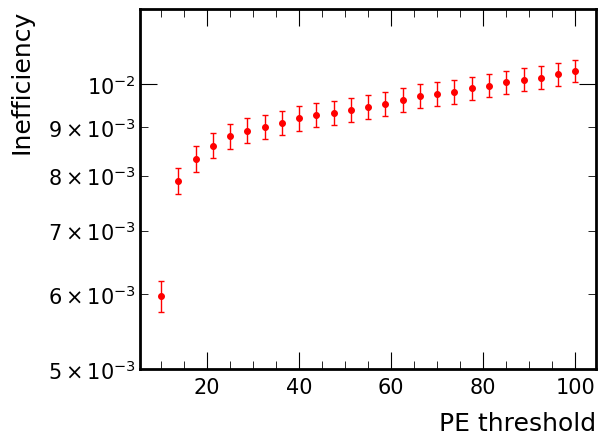

In [41]:
pl.PlotGraph(x=PEs_, y=ineff_, yerr=ineff_err_,
             xlabel='PE threshold', ylabel='Inefficiency', 
             log_y=True, ymin=0.5e-2, ymax=1.20e-2, col='red',
             save=True, fout='../Images/gr_ineff_0.png')